In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Downloading and saving the data from yfinance

In the code cell below I write a function called `get_data()`. The purpose of this function is to download, organise and save data for the five 'FAANG' stocks for the 5 day period directly preceding the day on which the code is run. The function does that by:

1. Using the Panda library's Timestamp function to get the current date and time and then specifying exactly how that should be formatted with `.strftime('%Y%m%d-%H%M%S')` ([I referenced the documentation here to write this part of the function](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)).

2. Creating the file_path variable (where the FAANG data should be saved), and using f strings to make set the file name equal to the current_date_time variable value. This results data file (the downloaded FAANG data) being clearly timestamped and easily identified within the specified folder on my system.

3. Using the yfinance library's `yf.download` function to download stock data for the five day period from the five FAANG stocks ([I referenced the documentation here in order to write this part of the function](https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html)).

4. Saving this to a Pandas dataframe, and then creating a `pd.MultiIndex` object from this. I initially ran into issues when attempting to go from a Dataframe to a CSV file. After some web searches I learnt that multi-indexing was a possible solution to these issues, and I researched and then created a multi-index dataframe. This resulted in my dataframe having 'Close', 'Open', and 'Volume' headings as index objects above each of the stocks, improving readability and also instructing python to properly convert the data frame into a readable csv file ([I learnt about multi-indexing with Pandas here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)).

5. Saving the dataframe to a csv file using the earlier specified file path, and subsequently returning the file path. The reason that I return the file path and then set it equal to the function when I call it (`file_path = get_data()`), is that this both runs the function and stores the file path for use in the next function that I will be using.




In [5]:
def get_data():
        # getting the current date and time to use in the file name
        current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S')
        file_path = f'C:/Users/fmtie/OneDrive/Desktop/comp-infrastructure/data/{current_date_time}.csv'
        # here I specify the tickers of each company as arguments in a single string, and specify the period to be the past 5 days as another argument
        faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d")
        # converting data to a dataframe
        faang_stock_data_frame = pd.DataFrame(faang_stock_data_past_5_days)
        # setting multi-index for better organization
        pd.MultiIndex.from_frame(faang_stock_data_frame)
        faang_stock_data_frame.to_csv(file_path)
        # returning updated file path for use in another function to be called later
        return file_path

# running the function while saving the returned file path for use in later function
file_path = get_data()


C:\Users\fmtie\AppData\Local\Temp\ipykernel_1956\4212487768.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang_stock_data_past_5_days = yf.download('meta aapl amzn nflx goog', period="5d")
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting the data

In the code cell below, I write a function called plot_data(). The purpose of this function is to open the recently saved csv file generated through the `get_data()` function, and plot the close prices for each of the five stocks. This function:

1. Gets the current date and time (for the plot title so that the time frame is clear) by using the `Pandas.Timestamp` function again.

2. Opens the csv file using `pd.read_csv` and stores it as a dataframe. Because it was multiindexed when saved as a csv file, it is important to account for that when opening the file as a dataframe by specifying that the first two rows are header rows. This is acheived by using the `header=` argument and passing a list to it `[0,1]`, marking the first two rows as headers.

3. Creates  a new variable 'closes' from the Close data in the dataframe, and then takes the column names from this new variable and stores each under the variable 'tickers' for use in the plot legend.

4. Creates a figure (plot area), using the matplotlib library's `plt.figure` function, specifying the size of the plot area using the `figsize=` argument.

5. Create a plot 'ax1', using the `fig.add_subplot` function, adds a title and legend, and specifies the line width and style for the plot ([I referenced the matplotlib documentation here when writing this part of the function](https://matplotlib.org/stable/users/explain/axes/index.html)).

6. Saves the plot as a .png file to a specified file path using `plt.savefig()`. As per the documentation, .png format is the default when the argument is not specified, so I just needed to include the file path here ([I referenced the documentation here for this part of the function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)).

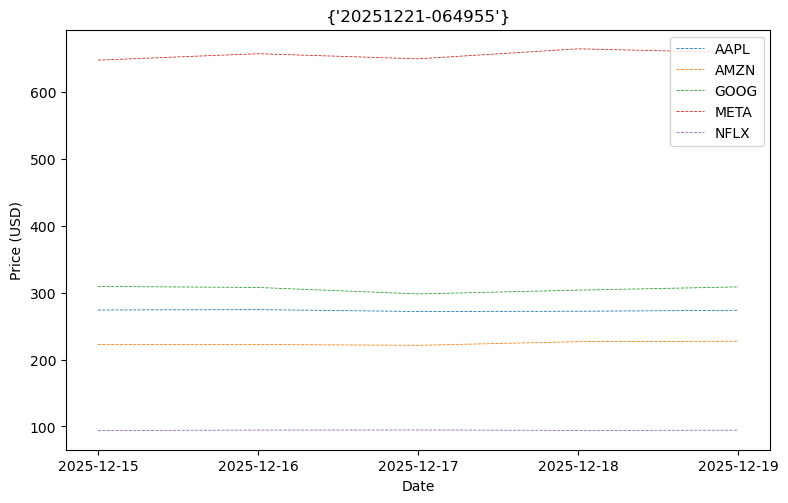

In [6]:
def plot_data():
    # getting the current date and time to use in the plot title
    current_date_time = pd.Timestamp.now().strftime('%Y%m%d-%H%M%S')
    # reading the csv file saved earlier
    faang_df = pd.read_csv(file_path, index_col=0, header=[0,1])
    # extracting the 'Close' prices for plotting
    closes = faang_df['Close']
    # getting the tickers for labeling
    tickers = closes.columns
    # creating the plot
    fig = plt.figure(figsize=(20, 12))
    ax1 = fig.add_subplot(2, 2, 1)
    # styling the plot
    ax1.set_title({current_date_time})
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.plot(closes[tickers], lw=0.6, ls='--')
    ax1.legend(tickers)
    # saving the plot to a specified directory with current date and time in the filename
    plt.savefig(f'C:/Users/fmtie/OneDrive/Desktop/comp-infrastructure/plots/{current_date_time}.png')

# calling the funtion
plot_data()


## Problem 3: Script

Initially, I tried to mark the script as executable on my machine and add a shebang line into the top of my script to make it executable from the terminal. However, after doing this, when I typed the file name into the terminal, it would open but not run the script. Additionally, I had to first navigate to the folder my script was in. I asked Copilot for guidance - you can view this conversation [here](https://copilot.microsoft.com/shares/5yk87y43HYjypoqf47ZED).

Following Copilots advice, I created a .bat file and stored it in the same folder as my script. This is a plain text file containing instructions for Windows that are carried out when you call it.

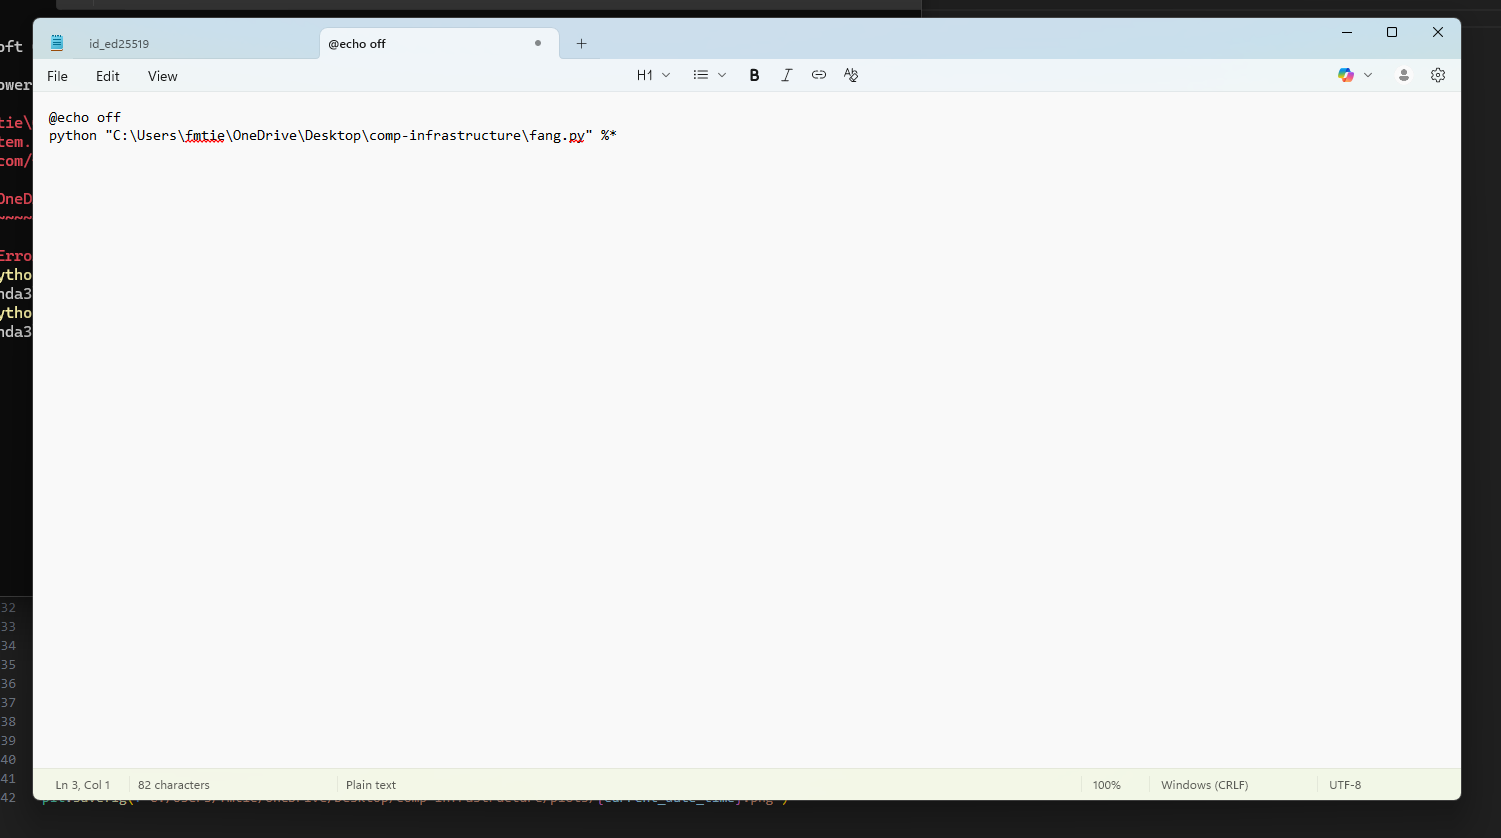

Afterwards, I could open Windows Powershell and simply type "faang" to run my script, as you can see below. Technically I am calling the .bat file directly and the faang script only indirectly, but the outcome is the same.

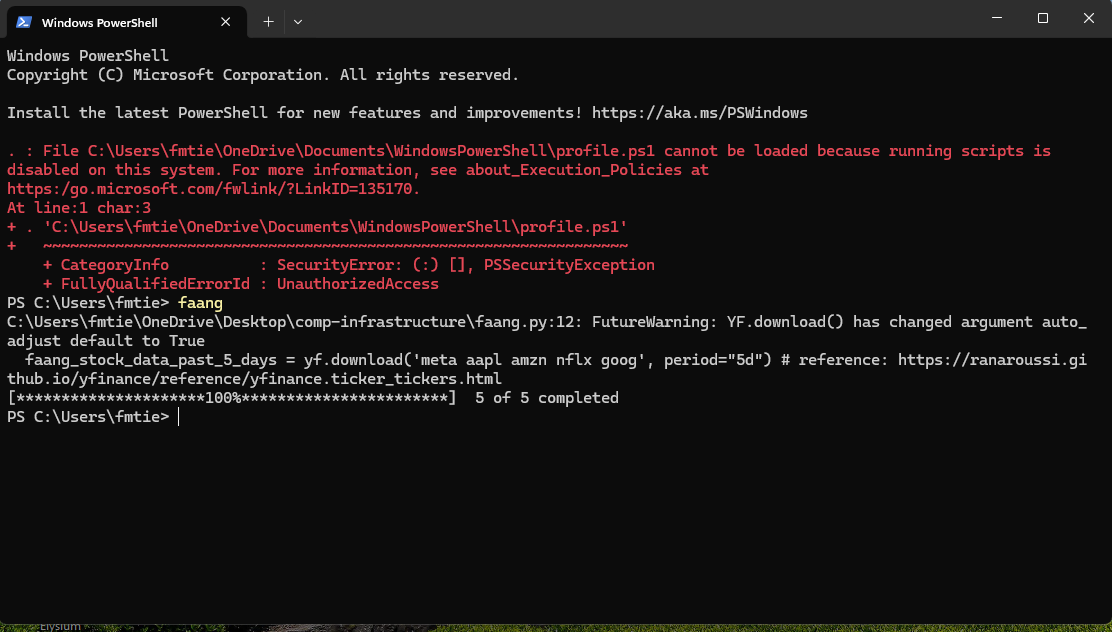

## Problem 4: Automation
Finally in this project, I automate the script to run every Saturday morning using Github Workflows.

Using [this guide](https://docs.github.com/en/actions/how-tos/write-workflows/choose-what-workflows-do/add-scripts), as well as [this guide](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax) and lecture material, I wrote the below script and stored it in a .github/workflows folder in my repository.

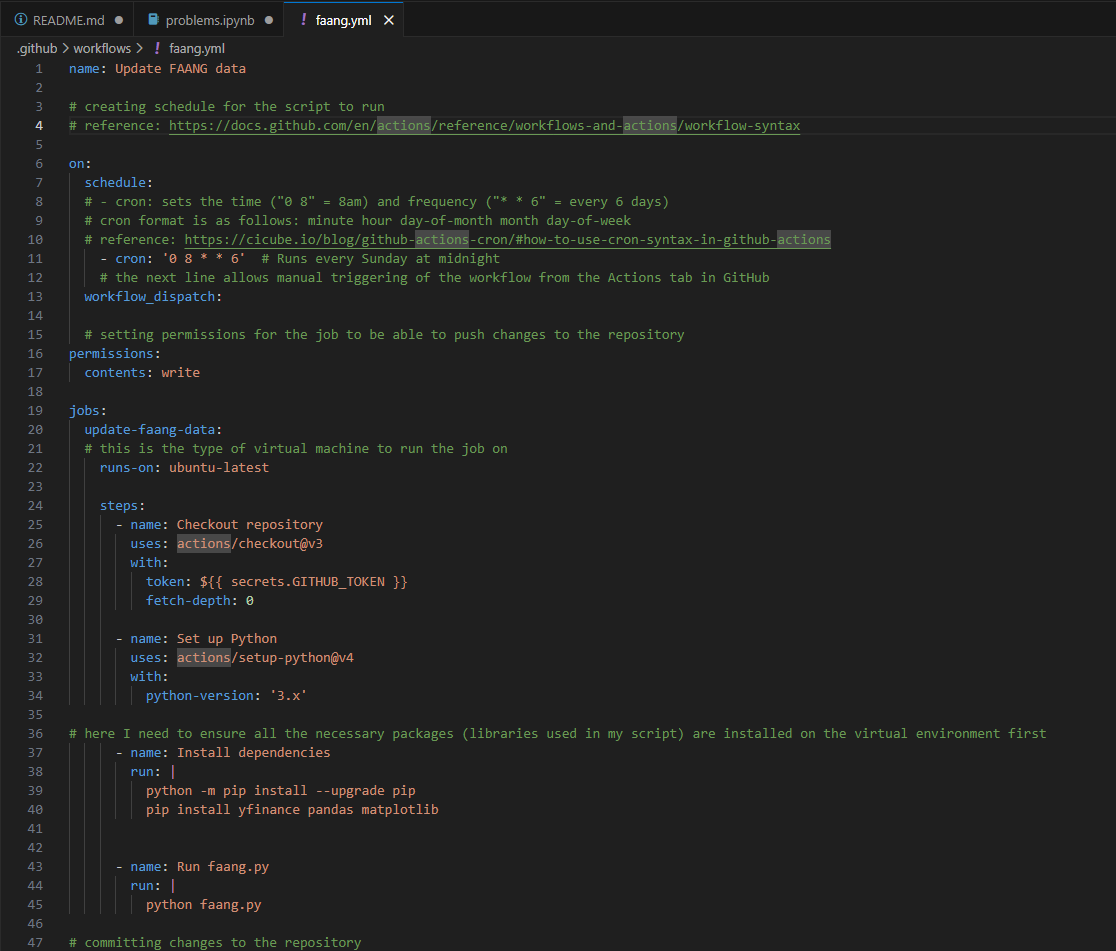

This script uses [YAML syntax](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax) to create a schedule for the script to run. I worked off a template available from one of my lectures, and used [this guide](https://blog.devops.dev/a-complete-guide-to-creating-github-actions-pipeline-with-yaml-templates-c57f2dbc2d0c) as a support, as well as the YAML sytnax guide referenced earlier.

The yaml script needed simply to be pasted in (as pictured below), after navigating to the 'Actions' tab of my repository, choosing 'Create new workflow', and then selecting the 'Set up your own workflow' option.

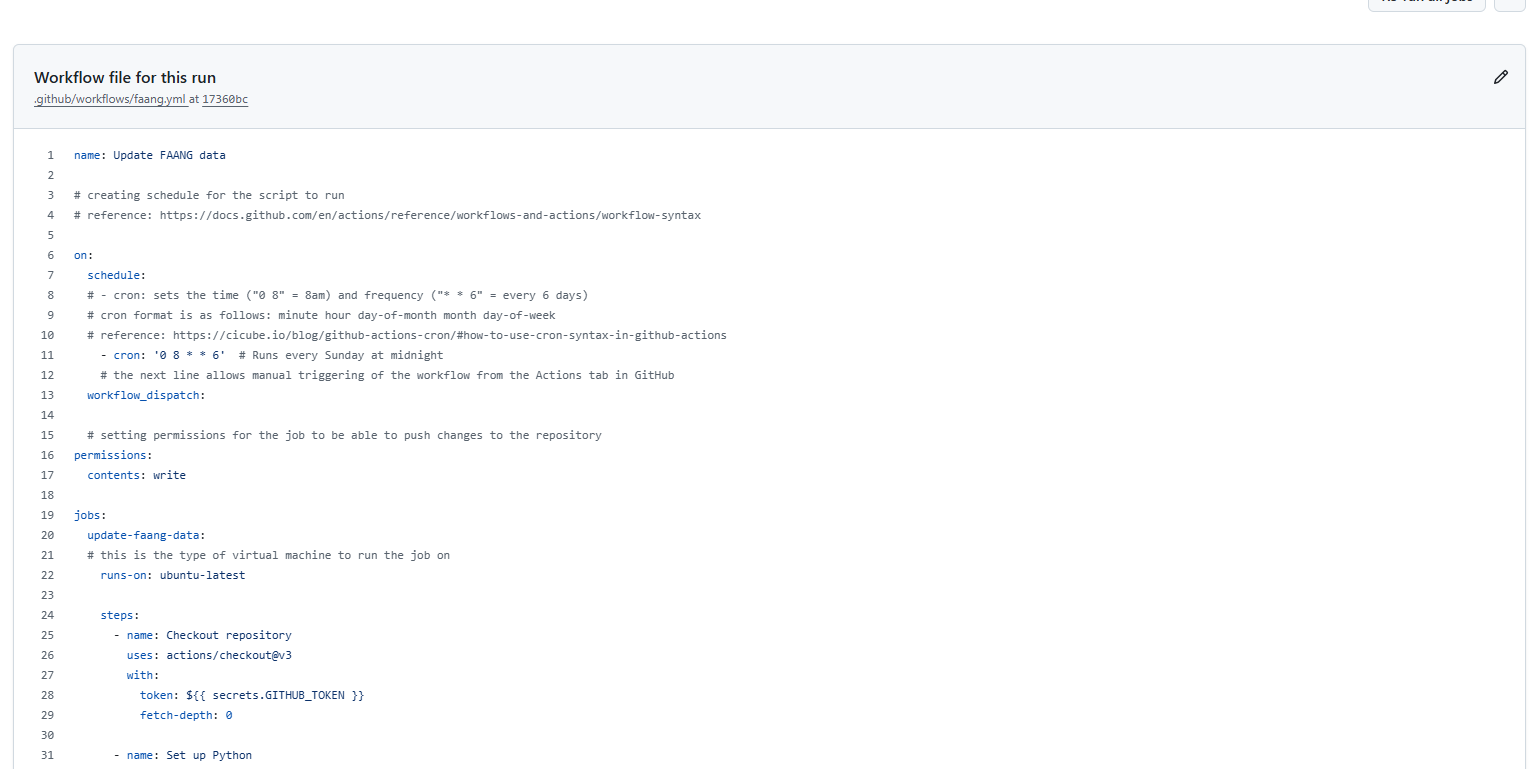

Because I'd included the line `workflow_dispatch` in my script, I was able to test that it manually. After one or two failed attempts and a few tweaks to the code, it ran successfully. The following Saturday a new plot of FAANG data timestamped with that day's date was successfully stored in the 'data' folder in my repository.





